In [81]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

In [82]:
weather_df = pd.read_csv('telangana 2021-07-01 to 2023-07-21.csv', parse_dates=['datetime'], index_col='datetime')
weather_df.head(5)

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2021-07-01,telangana,31.0,24.3,28.3,36.8,24.3,32.3,24.2,79.0,11.0,...,9.1,3,NaN,2021-07-01T05:45:28,2021-07-01T18:54:32,0.71,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"VOHY,F3069,43083099999,43128599999,VOHS,431280..."
2021-07-02,telangana,28.0,23.0,25.3,31.3,23.0,25.8,22.8,86.4,5.2,...,9.6,5,NaN,2021-07-02T05:45:46,2021-07-02T18:54:36,0.75,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,"VOHY,F3069,43083099999,43128599999,VOHS,431280..."
2021-07-03,telangana,31.1,24.0,27.8,36.6,24.0,30.0,22.5,73.6,0.0,...,18.5,7,NaN,2021-07-03T05:46:04,2021-07-03T18:54:40,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,F3069,43083099999,43128599999,VOHS,431280..."
2021-07-04,telangana,32.1,24.0,28.0,37.8,24.0,30.7,23.0,75.0,0.3,...,22.6,9,NaN,2021-07-04T05:46:23,2021-07-04T18:54:43,0.81,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"VOHY,F3069,43083099999,43128599999,VOHS,431280..."
2021-07-05,telangana,31.4,26.0,28.0,37.0,26.0,30.7,23.7,77.9,0.4,...,17.4,6,NaN,2021-07-05T05:46:42,2021-07-05T18:54:45,0.84,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"VOHY,F3069,43083099999,43128599999,VOHS,431280..."


In [83]:
weather_df.columns

Index(['name', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [84]:
weather_df.shape

(751, 32)

In [85]:
weather_df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,...,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,558.000000,751.000000
mean,30.859387,21.112517,25.744874,32.104794,21.144341,26.234088,18.071904,67.047270,3.173502,42.153395,...,16.540213,174.628495,1011.123036,51.921172,5.933822,222.246072,19.171904,8.233023,14.820789,0.485379
std,3.795873,3.476550,3.113488,4.398879,3.539475,3.560267,4.431204,17.126074,9.652193,48.955371,...,5.903760,94.693825,4.116246,28.768303,2.664743,66.990549,5.780489,2.055309,11.132633,0.290746
min,22.000000,10.500000,19.000000,22.000000,10.500000,19.000000,3.700000,27.500000,0.000000,0.000000,...,7.600000,0.700000,1001.600000,0.000000,2.800000,14.100000,1.100000,1.000000,10.000000,0.000000
25%,28.300000,19.000000,23.500000,28.800000,19.000000,23.400000,15.050000,53.200000,0.000000,0.000000,...,12.600000,95.150000,1007.800000,30.800000,5.000000,193.450000,16.700000,8.000000,10.000000,0.250000
50%,30.000000,22.000000,25.300000,31.400000,22.000000,25.600000,19.000000,68.100000,0.000000,0.000000,...,15.100000,136.500000,1010.600000,53.300000,5.400000,229.000000,19.700000,9.000000,10.000000,0.500000
75%,33.050000,23.100000,27.400000,35.550000,23.100000,28.650000,21.900000,81.600000,0.800000,100.000000,...,18.800000,268.000000,1014.800000,75.600000,6.000000,265.000000,22.900000,10.000000,10.000000,0.750000
max,40.100000,30.000000,34.100000,43.000000,29.700000,34.900000,24.200000,98.100000,91.000000,100.000000,...,53.900000,359.600000,1020.300000,100.000000,24.100000,338.800000,29.400000,10.000000,75.000000,0.980000


In [86]:
weather_df.isnull().any()

name                False
tempmax             False
tempmin             False
temp                False
feelslikemax        False
feelslikemin        False
feelslike           False
dew                 False
humidity            False
precip              False
precipprob          False
precipcover         False
preciptype           True
snow                False
snowdepth           False
windgust             True
windspeed           False
winddir             False
sealevelpressure    False
cloudcover          False
visibility          False
solarradiation      False
solarenergy         False
uvindex             False
severerisk           True
sunrise             False
sunset              False
moonphase           False
conditions          False
description         False
icon                False
stations             True
dtype: bool

In [87]:
weather_df_num=weather_df.loc[:,['tempmax','tempmin','temp','humidity','snow', 'windspeed','sealevelpressure', 'cloudcover', 'solarradiation','moonphase']]
weather_df_num.head()

,tempmax,tempmin,temp,humidity,snow,windspeed,sealevelpressure,cloudcover,solarradiation,moonphase
datetime,,,,,,,,,,
2021-07-01,31.0,24.3,28.3,79.0,0,11.2,1006.8,85.8,104.7,0.71
2021-07-02,28.0,23.0,25.3,86.4,0,18.4,1008.3,91.1,110.8,0.75
2021-07-03,31.1,24.0,27.8,73.6,0,23.0,1008.7,75.5,213.7,0.78
2021-07-04,32.1,24.0,28.0,75.0,0,14.8,1008.6,58.1,262.8,0.81
2021-07-05,31.4,26.0,28.0,77.9,0,11.3,1008.3,72.8,200.8,0.84


In [88]:
weather_df_num.shape

(751, 10)

In [89]:
weather_df_num.columns

Index(['tempmax', 'tempmin', 'temp', 'humidity', 'snow', 'windspeed',
       'sealevelpressure', 'cloudcover', 'solarradiation', 'moonphase'],
      dtype='object')

array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>],
      dtype=object)

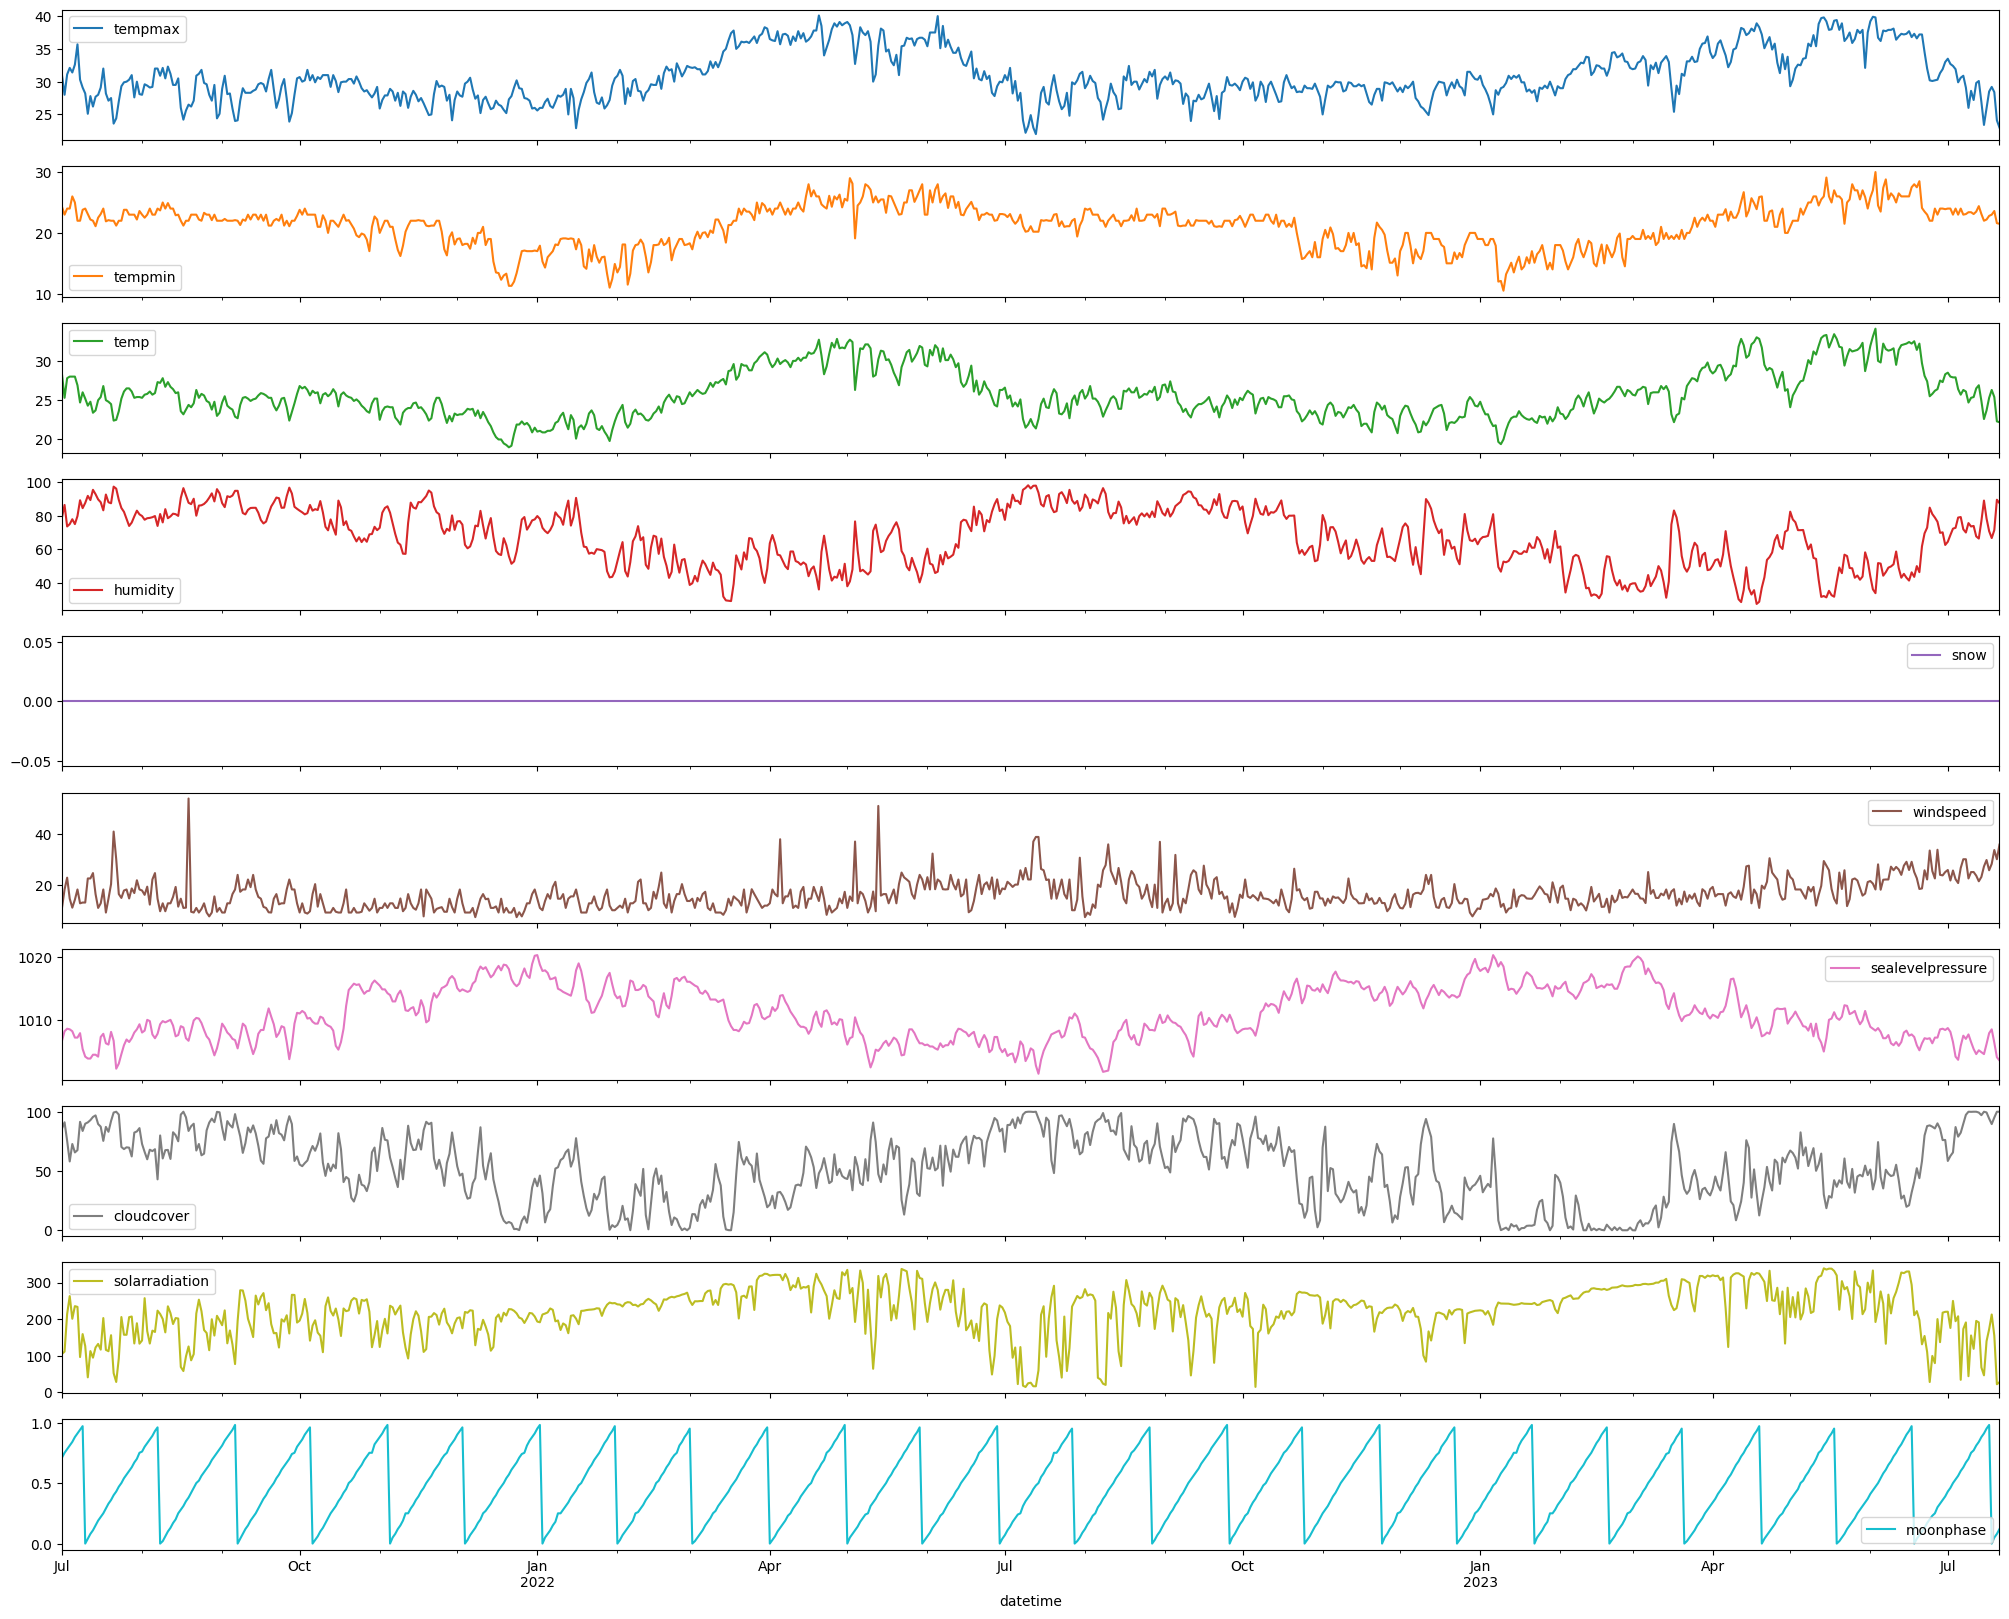

In [90]:
weather_df_num.plot(subplots=True, figsize=(25,20))

array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>],
      dtype=object)

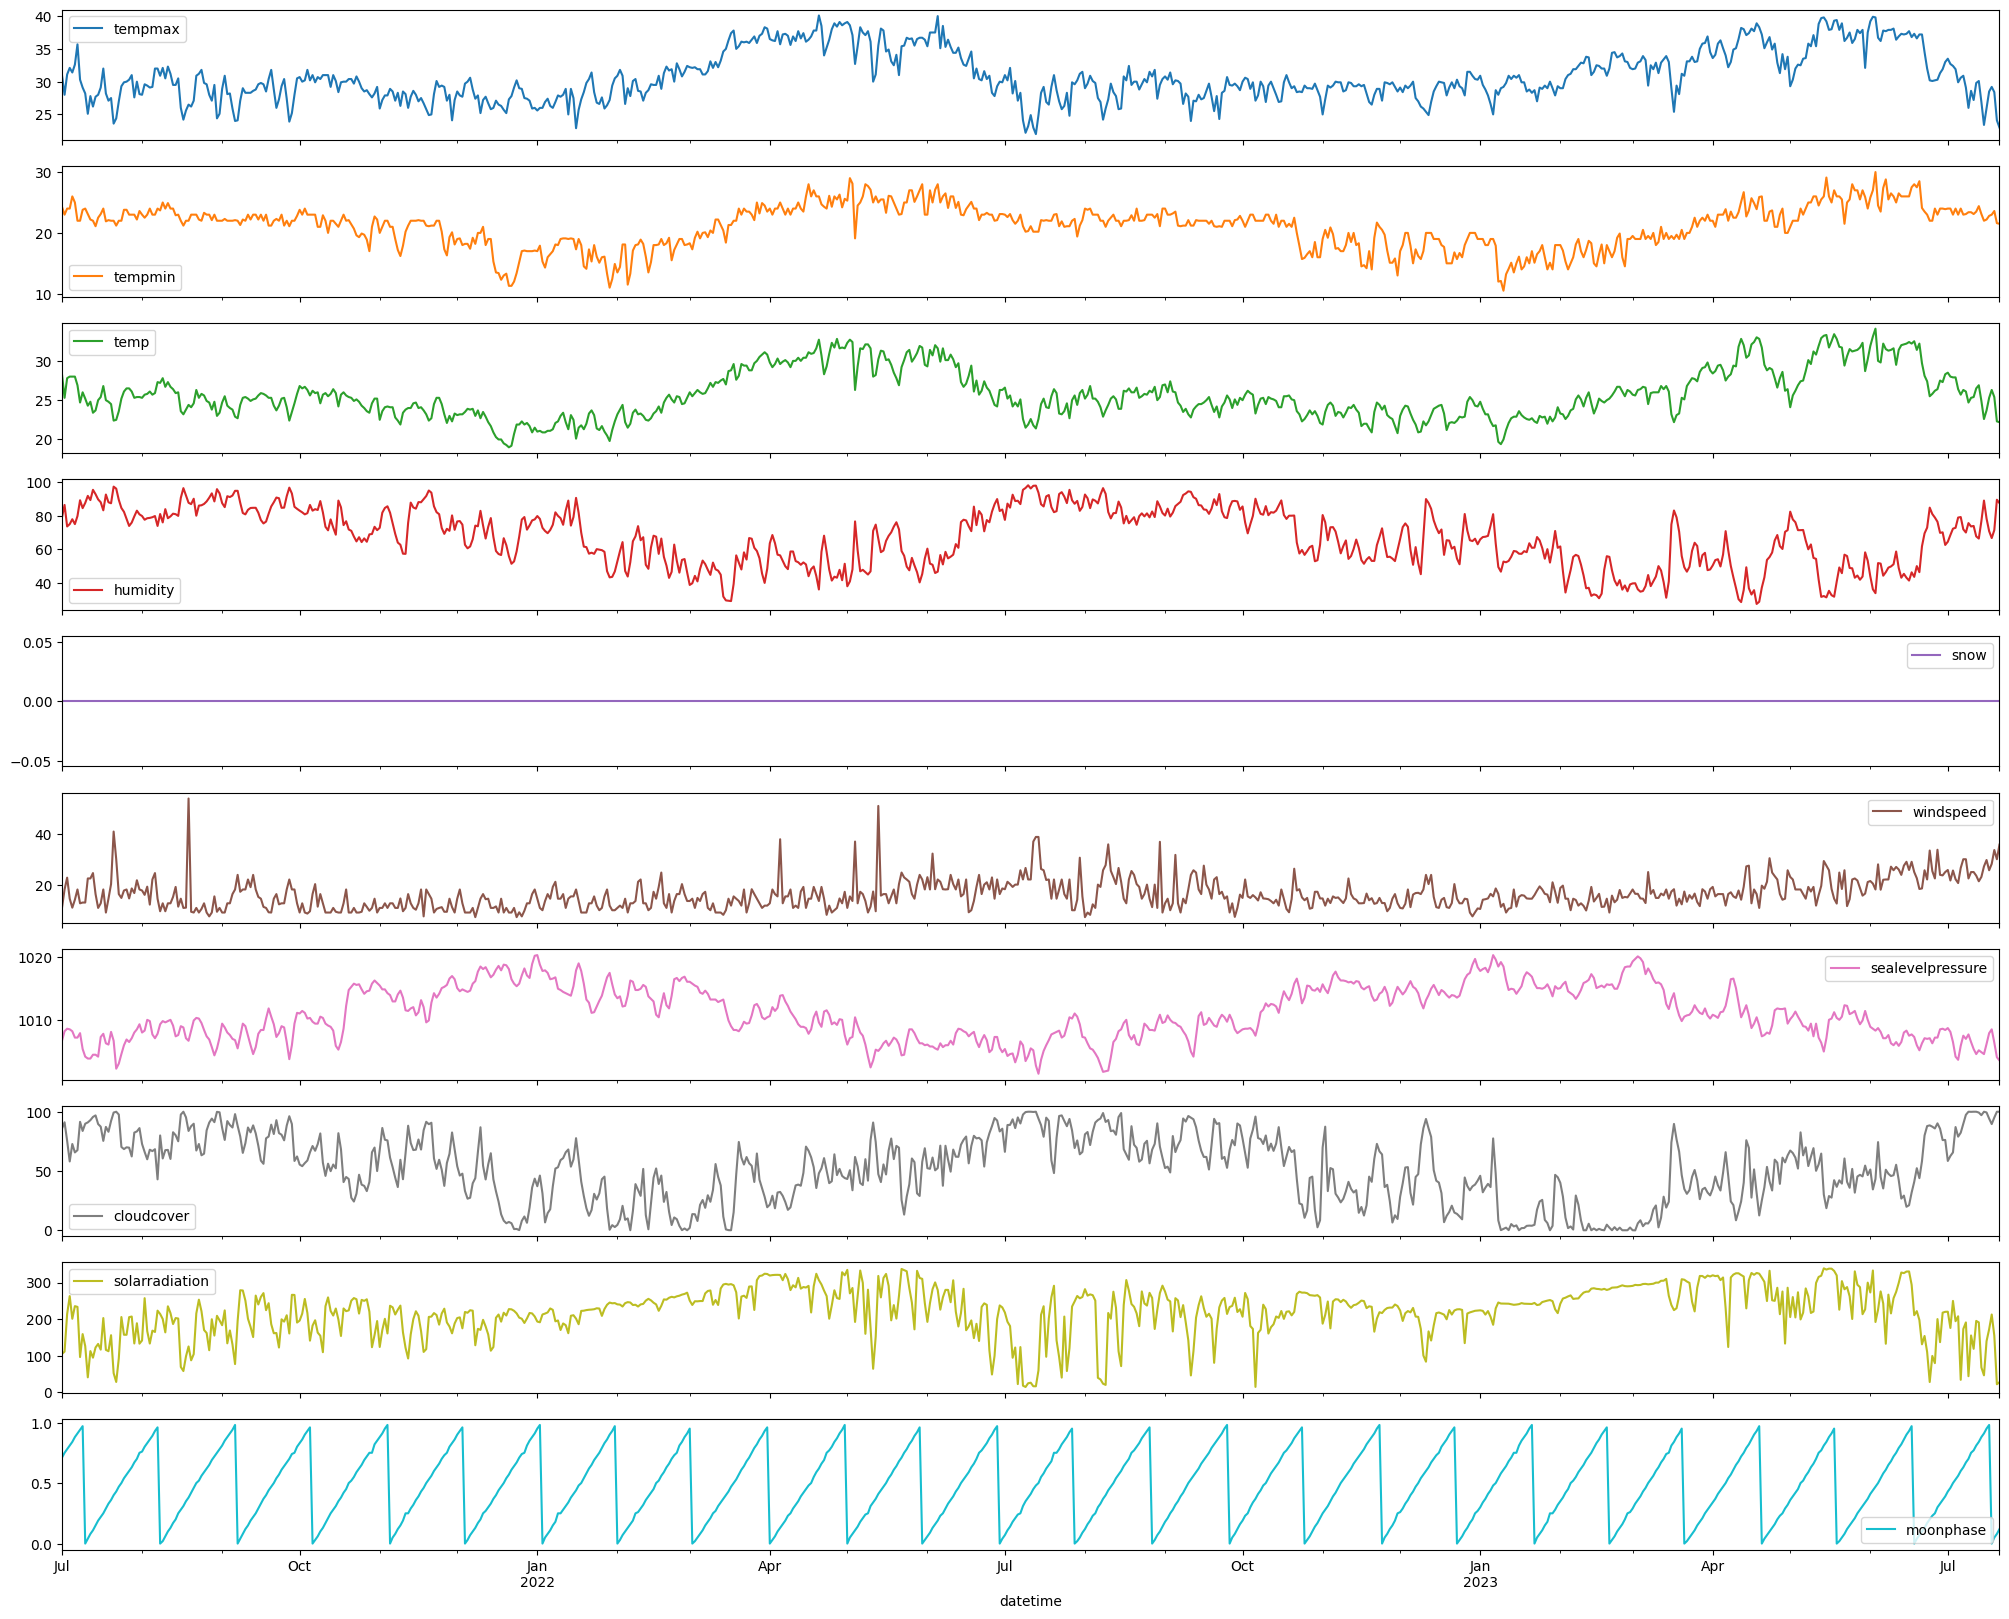

In [91]:
weather_df_num['2021':'2023'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20))

array([[<AxesSubplot:title={'center':'tempmax'}>,
        <AxesSubplot:title={'center':'tempmin'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'snow'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'sealevelpressure'}>,
        <AxesSubplot:title={'center':'cloudcover'}>,
        <AxesSubplot:title={'center':'solarradiation'}>],
       [<AxesSubplot:title={'center':'moonphase'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

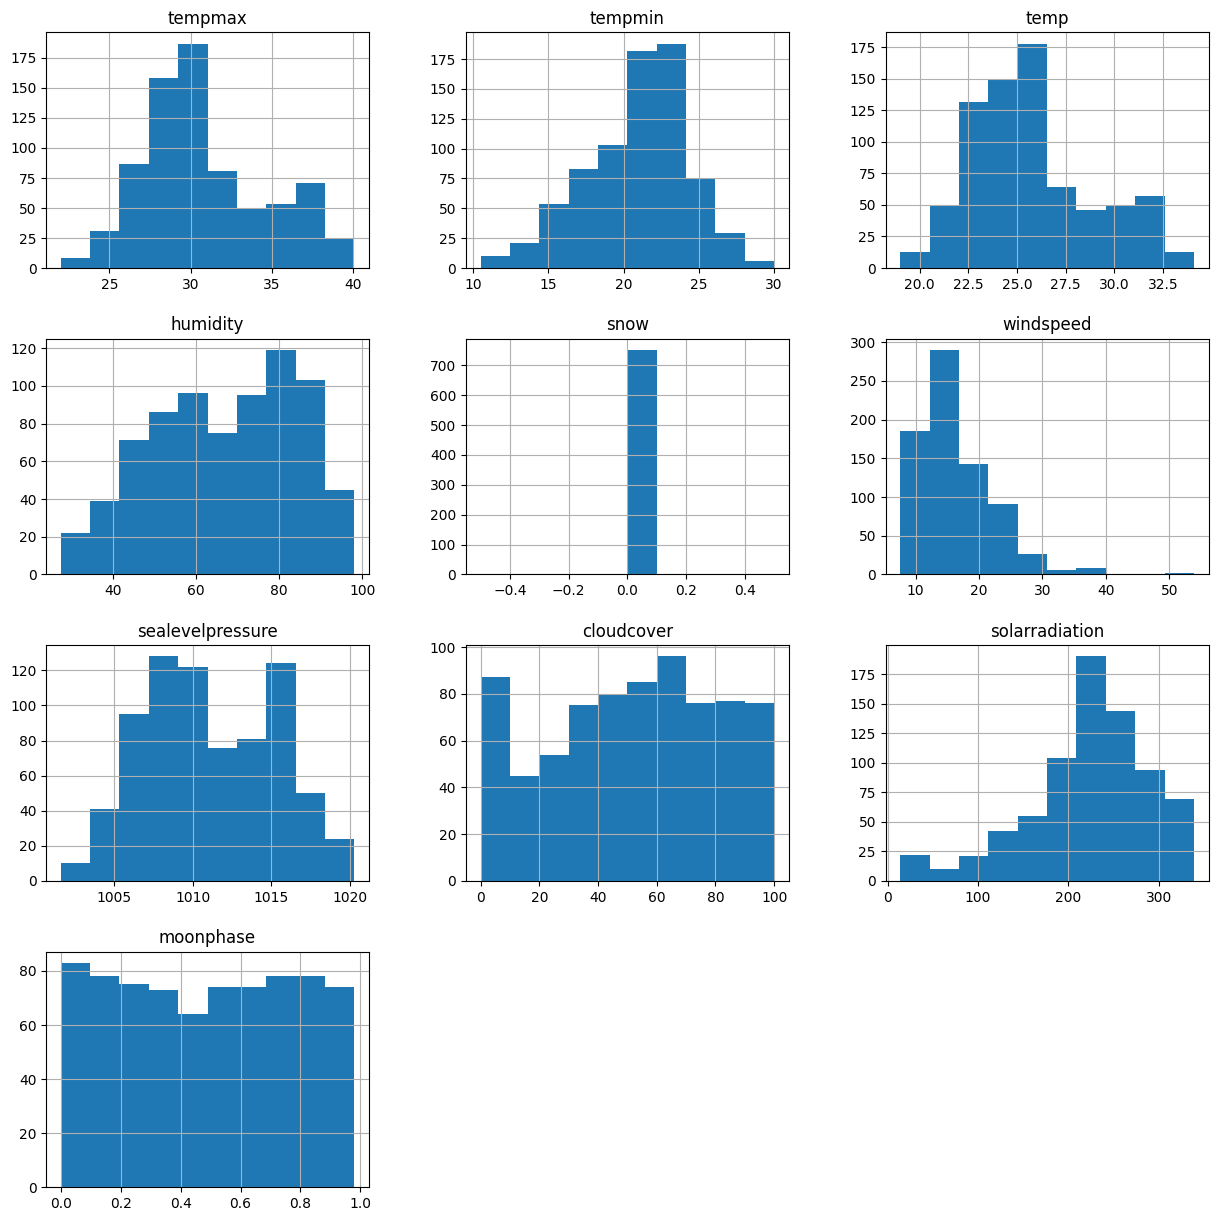

In [92]:
weather_df_num.hist(bins=10,figsize=(15,15))

In [93]:
weth=weather_df_num['2021':'2023']
weth.head()

,tempmax,tempmin,temp,humidity,snow,windspeed,sealevelpressure,cloudcover,solarradiation,moonphase
datetime,,,,,,,,,,
2021-07-01,31.0,24.3,28.3,79.0,0,11.2,1006.8,85.8,104.7,0.71
2021-07-02,28.0,23.0,25.3,86.4,0,18.4,1008.3,91.1,110.8,0.75
2021-07-03,31.1,24.0,27.8,73.6,0,23.0,1008.7,75.5,213.7,0.78
2021-07-04,32.1,24.0,28.0,75.0,0,14.8,1008.6,58.1,262.8,0.81
2021-07-05,31.4,26.0,28.0,77.9,0,11.3,1008.3,72.8,200.8,0.84


In [94]:
weather_y=weather_df_num.pop("temp")
weather_x=weather_df_num

In [95]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [96]:
train_X.shape

(600, 9)

In [97]:
train_y.shape

(600,)

In [98]:
train_y.head()

datetime
2021-09-29    24.6
2022-05-13    30.2
2022-12-11    21.8
2022-09-25    25.6
2022-11-03    24.4
Name: temp, dtype: float64

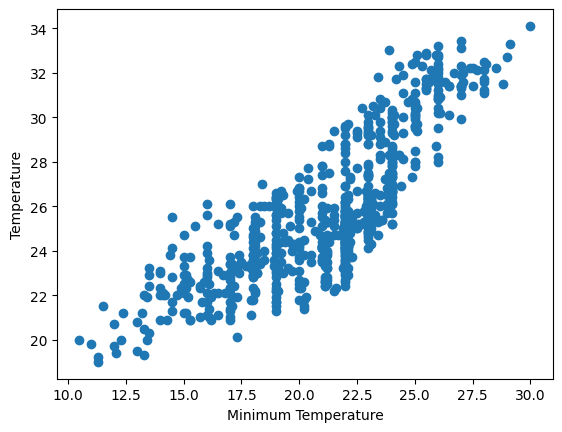

In [99]:
plt.scatter(weth.tempmin, weth.temp)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

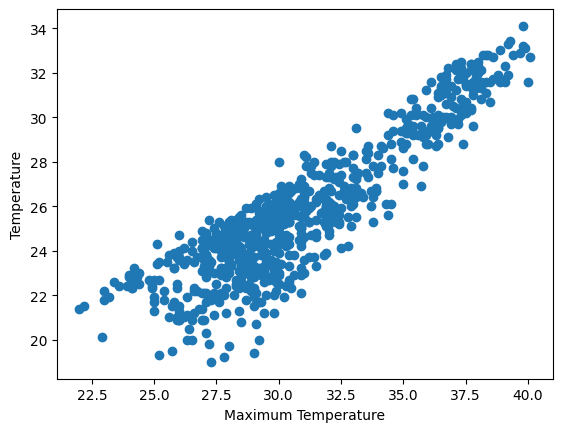

In [100]:
plt.scatter(weth.tempmax, weth.temp)
plt.xlabel("Maximum Temperature")
plt.ylabel("Temperature")
plt.show()

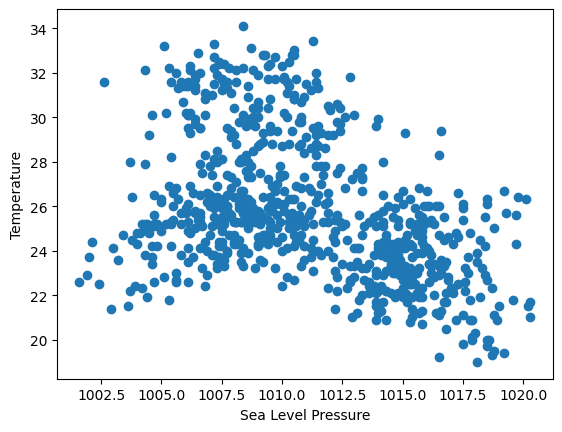

In [101]:
plt.scatter(weth.sealevelpressure, weth.temp)
plt.xlabel("Sea Level Pressure")
plt.ylabel("Temperature")
plt.show()

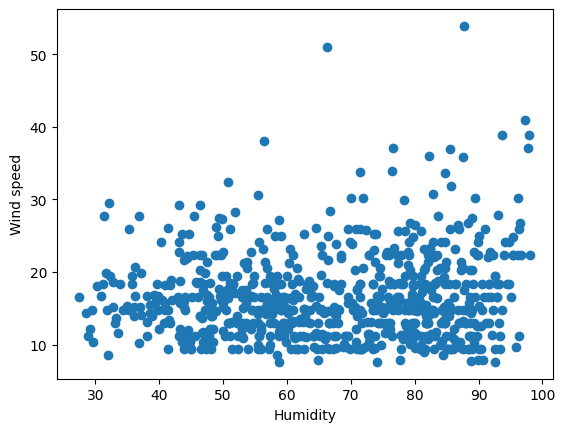

In [102]:
plt.scatter(weth.humidity, weth.windspeed)
plt.xlabel("Humidity")
plt.ylabel("Wind speed")
plt.show()

In [103]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [104]:
prediction = model.predict(test_X)

In [105]:
#calculating error
np.mean(np.absolute(prediction-test_y))

0.31813390950791937

In [106]:
print('Variance score: %.2f' % model.score(test_X, test_y))

Variance score: 0.98


In [107]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

,Actual,Prediction,diff
datetime,,,
2022-12-18,23.3,23.83,-0.53
2023-01-27,22.0,21.73,0.27
2021-09-02,25.5,25.88,-0.38
2022-08-18,26.5,26.82,-0.32
2021-11-25,24.5,24.39,0.11
...,...,...,...
2021-12-28,22.1,22.02,0.08
2022-12-19,21.2,21.54,-0.34
2022-04-05,29.6,29.98,-0.38


In [108]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [109]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

0.45364238410596025

In [110]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.97


In [111]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

,Actual,Prediction,diff
datetime,,,
2022-12-18,23.3,24.4,-1.1
2023-01-27,22.0,22.3,-0.3
2021-09-02,25.5,25.5,0.0
2022-08-18,26.5,26.2,0.3
2021-11-25,24.5,24.1,0.4
...,...,...,...
2021-12-28,22.1,21.1,1.0
2022-12-19,21.2,21.9,-0.7
2022-04-05,29.6,30.1,-0.5


In [112]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [113]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

0.31518543046357594

In [114]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 0.98


In [115]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

,Actual,Prediction,diff
datetime,,,
2022-12-18,23.3,23.79,-0.49
2023-01-27,22.0,22.22,-0.22
2021-09-02,25.5,25.67,-0.17
2022-08-18,26.5,26.63,-0.13
2021-11-25,24.5,24.25,0.25
...,...,...,...
2021-12-28,22.1,21.78,0.32
2022-12-19,21.2,22.03,-0.83
2022-04-05,29.6,30.01,-0.41


In [116]:
from sklearn.metrics import r2_score

In [117]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 0.32
Residual sum of squares (MSE): 0.18
R2-score: 0.98


In [118]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )

Mean absolute error: 0.45
Residual sum of squares (MSE): 0.37
R2-score: 0.97


In [119]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

Mean absolute error: 0.32
Residual sum of squares (MSE): 0.17
R2-score: 0.98
